# **Final Team Project: Advanced Generative Chatbot Design**

# **SQuAD Q&A Chatbot**

### **Submission by Team 7 : Vedant Kumar , Satyam Kumar, Meghann Sandhu**

### **Under the Supervision of Prof. Haisav Chokshi**

### **Natural Language Processing and GenAI (AAI-520-A1)**

### **University of San Diego**

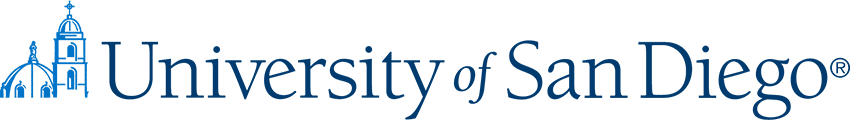

# Introduction

This project focuses on building and fine-tuning a Question-Answering (QA) system using the **SQuAD 2.0** dataset, combined with **Retrieval-Augmented Generation (RAG)** and a vector database to enhance the system’s ability to provide accurate multi-turn conversations and context-aware answers. The QA model is based on advanced deep learning techniques, particularly leveraging **BERT** (Bidirectional Encoder Representations from Transformers), for handling both answerable and unanswerable questions. The integration of a vector database allows for efficient and context-aware retrieval of relevant documents, enabling the chatbot to answer user queries based on both predefined contexts and external documents such as PDFs. This hybrid approach enables real-time interaction and provides relevant, contextually accurate answers to user questions even when the answer might not be explicitly present in the training data.

The implementation leverages state-of-the-art tools such as **Hugging Face's Transformers** for model fine-tuning, **FastAPI** for backend communication, and a vector database (such as **Pinecone**, **FAISS**, or **Weaviate**) to enhance retrieval capabilities. With a user-friendly front-end developed using **Bootstrap** and custom **JavaScript**, this chatbot offers an interactive and seamless user experience. It allows users to upload documents and receive precise answers based on real-time contextual retrieval and generation.

The **SQuAD 2.0** dataset presents a unique challenge by including questions that may not have answers within the given context. The model is trained not only to extract the correct answer from the context but also to identify when no answer is possible. The fine-tuned BERT model learns to predict the start and end positions of an answer within the context, improving the model’s ability to process complex language tasks.

## Key features of this project include:

- **Fine-tuning BERT for QA**: The model is optimized through mixed precision training, utilizing GPUs to speed up computations and improve efficiency.
- **Retrieval-Augmented Generation (RAG)**: In addition to fine-tuning, RAG is incorporated to extend the model’s capabilities by retrieving relevant information from external documents. A vector database stores contextual embeddings from these documents, which the model accesses in real-time to generate more accurate answers.
- **Interactive QA with PDF Uploads**: Users can upload PDF documents, which are processed and stored in the vector database. This allows the system to not only answer questions based on predefined datasets but also pull relevant context from the uploaded documents for more tailored responses.
- **Evaluating Model Performance**: The system is evaluated using metrics such as Exact Match (EM), F1-score, and other performance indicators. Various visualizations, including attention maps, histograms of predicted answer lengths, and confidence distributions, provide insights into the model’s behavior and how it processes information.
- **Visualizing and Analyzing Model Outputs**: Key visualizations such as confusion matrices and distribution plots help assess the model’s ability to distinguish between answerable and unanswerable questions, while attention maps allow for deeper understanding of how the model attends to different parts of the context.

The integration of a vector database and RAG allows the system to extend beyond simple extractive QA, enabling it to answer questions based on dynamically retrieved information. This makes the system highly adaptable to various use cases, such as document-based question answering, and enhances its real-world applicability. Overall, this project demonstrates the effectiveness of transformer models like BERT in QA tasks and the power of RAG and vector databases in improving contextual understanding and retrieval-based tasks.

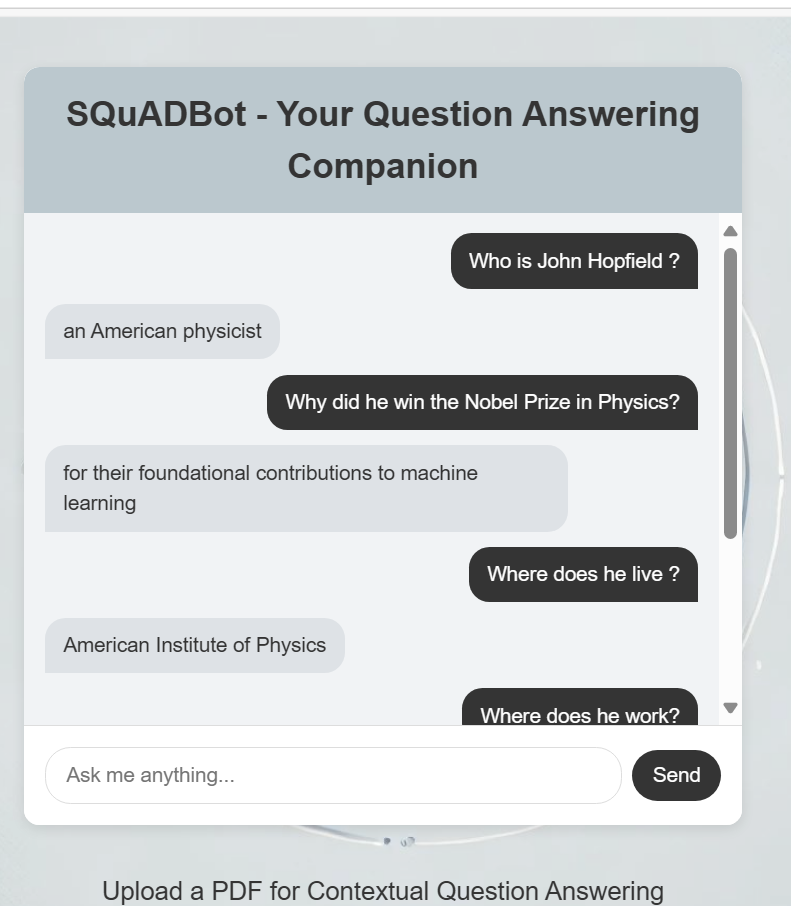


# **Dataset: SQuAD 2.0**

The **Stanford Question Answering Dataset (SQuAD) 2.0** is one of the most widely used datasets for training and evaluating Question-Answering (QA) models. It combines over 100,000 questions with an additional layer of complexity by including unanswerable questions. This feature makes SQuAD 2.0 a more realistic and challenging dataset for QA tasks compared to its predecessor, SQuAD 1.1, which only featured answerable questions.

## Key Characteristics of the SQuAD 2.0 Dataset:
1. **Answerable and Unanswerable Questions**:
   - The dataset contains **questions with exact answers** as well as **questions with no correct answer**. This setup mimics real-world situations where users may ask questions that cannot be answered by the given context.
   
2. **Context-Based**:
   - Each question is paired with a context paragraph, usually extracted from Wikipedia articles. For answerable questions, the answer is always a contiguous span of text within the context. For unanswerable questions, the correct response is "no answer," which forces the model to learn when to abstain from answering.
   
3. **Training and Validation Splits**:
   - The dataset is split into a training set and a validation set. The **training set** consists of questions and corresponding contexts that the model uses to learn, while the **validation set** is used for evaluating the model’s performance.

4. **Annotations**:
   - For each answerable question, the dataset provides the **start position** and **end position** of the answer within the context. This enables models to be trained in a supervised manner, learning to predict where in the context the answer begins and ends.
   
5. **Types of Questions**:
   - The questions in SQuAD 2.0 span a wide range of types, including fact-based questions (e.g., "Who is the president of France?"), entity-based questions (e.g., "What is the capital of Japan?"), and more complex ones that may require an understanding of context and inference.

## Dataset Statistics:
- **Total Questions**: 150,000+
- **Answerable Questions**: ~100,000
- **Unanswerable Questions**: ~50,000
- **Context Paragraphs**: Derived from Wikipedia articles, providing diverse domains and topics.

## Relevance to QA Tasks:
The inclusion of unanswerable questions in SQuAD 2.0 adds an extra layer of difficulty, making it a benchmark for developing robust QA systems. Models trained on SQuAD 2.0 must not only learn to locate the correct answers in a given context but also to recognize when an answer doesn't exist, which is crucial for real-world applications such as virtual assistants, search engines, and customer service bots.

## Preprocessing for Model Training:
For the purpose of this project, the SQuAD 2.0 dataset undergoes preprocessing:
- **Tokenization**: Each question and its context are tokenized using a transformer-based tokenizer (e.g., BERT tokenizer) to prepare the data for input into the model.
- **Labeling**: For answerable questions, the start and end positions of the answer in the context are labeled. For unanswerable questions, the start and end positions are both labeled as 0, indicating no answer exists in the context.

By leveraging the diverse and challenging aspects of SQuAD 2.0, this project aims to fine-tune a deep learning model capable of handling real-world QA scenarios with both answerable and unanswerable questions.


# **Implementation Steps**

## Data Preprocessing on SQuAD 2.0




#### The following commands installs all the necessary packages required for the QA chatbot project. Each library serves a specific purpose in model fine-tuning, evaluation, and deployment:




In [ ]:
!pip install "numpy<2.0" torch torchvision torchaudio transformers datasets accelerate nltk rouge_score tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 7.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: p

In [ ]:
!pip install transformers datasets accelerate nltk rouge_score tqdm

In [ ]:
!pip install "numpy<2.0" torch torchvision torchaudio transformers datasets accelerate nltk rouge_score tqdm



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
pip install matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 35.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install datasets

In [ ]:
!pip install wordcloud


In [ ]:
!pip install faiss-cpu

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Description of the Packages:

- **numpy<2.0**: A numerical computing library, used for handling arrays and matrices. The version is specified to be below 2.0 to ensure compatibility with other dependencies.

- **torch**: PyTorch, an open-source deep learning framework, is used for model training and inference in this project.


- **transformers**: The Hugging Face library, which provides pre-trained transformer models like BERT, GPT, and T5. It is essential for loading and fine-tuning models on the SQuAD 2.0 dataset.

- **datasets**: Hugging Face's `datasets` library is used for accessing various datasets, including SQuAD 2.0, and for easy data manipulation during fine-tuning.

- **accelerate**: A library from Hugging Face to make multi-GPU training faster and easier. It's used to speed up the fine-tuning process of the large transformer models.

- **nltk**: Natural Language Toolkit (NLTK) provides utilities for text preprocessing tasks like tokenization, stop-word removal, etc., which might be used for text manipulation.

- **rouge_score**: A package used to calculate ROUGE scores, which are common metrics for evaluating natural language generation tasks, like summarization and question answering.

- **tqdm**: A progress bar library that helps track the progress of long-running operations like model training or evaluation.

- **matplotlib**: A widely used plotting library in Python for creating static, animated, and interactive visualizations. In this project, it is used to generate plots such as histograms and scatter plots to visualize model predictions, evaluation metrics, and more.

- **seaborn**: A data visualization library built on top of matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly useful for creating heatmaps, correlation matrices, and other complex visualizations with ease.

- **scikit-learn**: A machine learning library that provides simple and efficient tools for data mining and data analysis. It includes various utilities like confusion matrices, F1 scores, and precision-recall metrics, which are used for evaluating machine learning models in the project.

- **faiss-cpu**: Faiss is an open-source library developed by Facebook AI Research (FAIR) for efficient similarity search and clustering of dense vectors. It's designed to handle large-scale datasets and is optimized for both memory usage and computational speed.

This installation ensures that all the necessary tools are available for the project, covering everything from model training and inference to evaluation and performance optimization.


### Dataset Loading

The script loads the SQuAD 2.0 dataset using the `datasets` library from Hugging Face. SQuAD 2.0 includes both answerable and unanswerable questions, making it ideal for training and evaluating a question-answering model. The `load_dataset` function fetches and prepares the dataset for use in model fine-tuning and evaluation tasks.


In [ ]:
# data_setup.py

from datasets import load_dataset

# Load the SQuAD 2.0 dataset
squad_dataset = load_dataset('squad_v2')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.92k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

This script imports essential libraries for deep learning, model fine-tuning, dataset handling, vector search (FAISS), and building an interactive UI with Streamlit, enabling end-to-end implementation of a question-answering system.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, TrainingArguments, Trainer
from datasets import load_dataset
import numpy as np
import faiss
import streamlit as st
import pandas as pd

In [ ]:
print (squad_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 11873
    })
})


This code first displays the first sample from the SQuAD 2.0 training set to give an overview of the data structure. It then converts both the training and validation sets into Pandas DataFrames for easier inspection and manipulation. Basic statistics, such as the number of training and validation samples, are printed to give a sense of the dataset's size.


In [ ]:
# Display the first sample of the training set
print(squad_dataset['train'][0])

# Convert to a Pandas DataFrame for easier inspection
squad_train_df = pd.DataFrame(squad_dataset['train'])
squad_val_df = pd.DataFrame(squad_dataset['validation'])

# Show some basic stats
print(f"Number of training samples: {len(squad_dataset['train'])}")
print(f"Number of validation samples: {len(squad_dataset['validation'])}")

{'id': '56be85543aeaaa14008c9063', 'title': 'Beyoncé', 'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".', 'question': 'When did Beyonce start becoming popular?', 'answers': {'text': ['in the late 1990s'], 'answer_start': [269]}}
Number of training samples: 130319
Number of validation samples: 11873


The dataset sample shown includes details about Beyoncé, focusing on her rise to fame. The context provides biographical information, and the question asks when Beyoncé started becoming popular. The answer, "in the late 1990s," is located at the 269th character of the context. This dataset includes a large number of training samples (130,319) and validation samples (11,873), indicating a comprehensive collection of question-answer pairs used for fine-tuning models on the SQuAD 2.0 dataset.








### **Distribution of Question Lengths**
The code calculates the length of each question in the SQuAD training dataset and visualizes the distribution using a histogram. Most questions are relatively short, as indicated by the high frequency of shorter question lengths. The plot also shows some outliers with significantly longer questions. Understanding this distribution helps in adjusting the model to better handle both short and long questions.

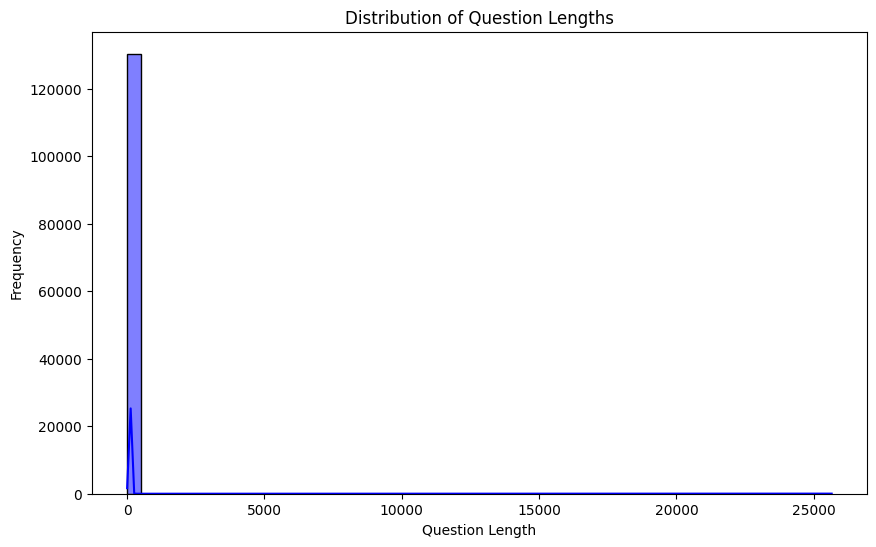

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute question lengths
squad_train_df['question_length'] = squad_train_df['question'].apply(len)

# Plot the distribution of question lengths
plt.figure(figsize=(10, 6))
sns.histplot(squad_train_df['question_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

### **Distribution of Context Lengths**
This code computes the length of the context passages in the SQuAD training dataset and visualizes their distribution using a histogram. The majority of context lengths are concentrated around a certain range, with a few longer contexts appearing as outliers. This distribution helps to understand the variability in context size and how the model may need to handle varying lengths of input during question answering.

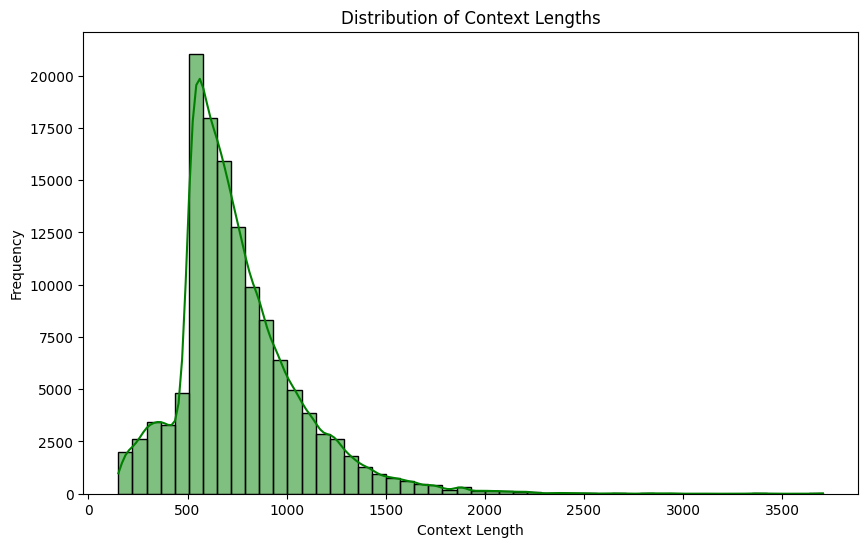

In [ ]:
# Compute context lengths
squad_train_df['context_length'] = squad_train_df['context'].apply(len)

# Plot the distribution of context lengths
plt.figure(figsize=(10, 6))
sns.histplot(squad_train_df['context_length'], bins=50, kde=True, color='green')
plt.title('Distribution of Context Lengths')
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.show()


The plot above shows the distribution of context lengths in the SQuAD training dataset. Most contexts are between 400 and 600 characters long, with fewer contexts exceeding 1000 characters. This helps us understand the typical length of passages the model needs to process during training, and allows for insight into how varying context lengths might influence model performance.



### **Visualization of Answer Lengths**


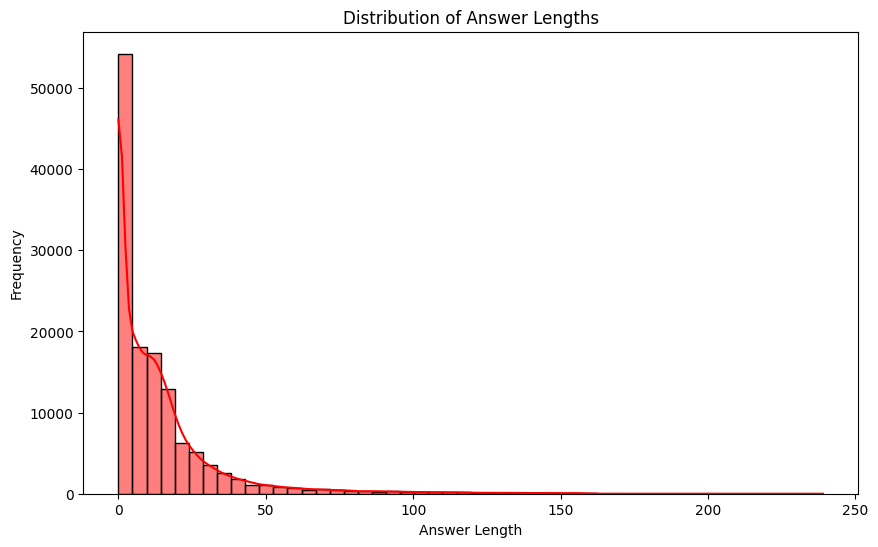

In [ ]:
# Extract answer lengths
squad_train_df['answer_length'] = squad_train_df['answers'].apply(lambda x: len(x['text'][0]) if len(x['text']) > 0 else 0)

# Plot the distribution of answer lengths
plt.figure(figsize=(10, 6))
sns.histplot(squad_train_df['answer_length'], bins=50, kde=True, color='red')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()


The histogram above shows the Distribution of Answer Lengths for the SQuAD training dataset. Most answers are relatively short, with the highest frequency being answers less than 20 characters in length. This distribution highlights the predominance of concise answers in the dataset, while longer answers are significantly less common.

This kind of analysis is crucial when developing and fine-tuning models, as it reveals the nature of the data the model will be working with and helps identify potential challenges with predicting longer responses.


### **Extracting Answer Start Positions and the Distribution**


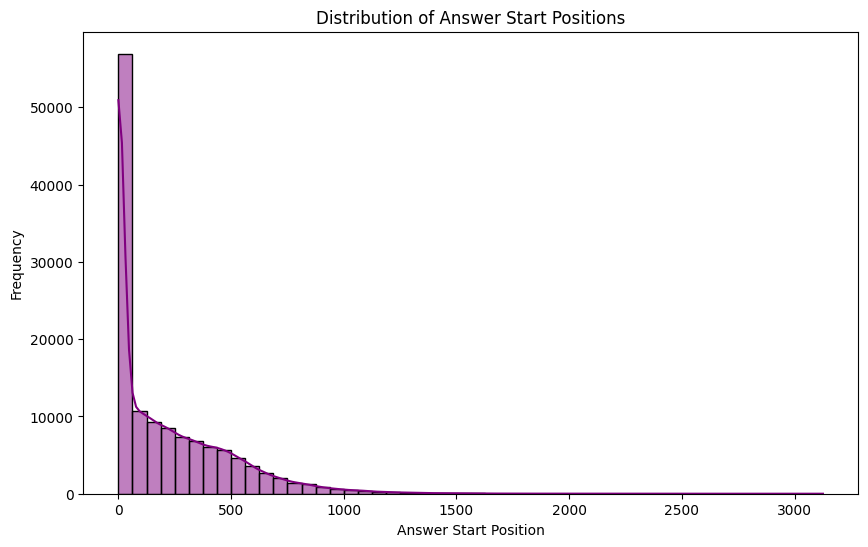

In [ ]:
# Extract the start position of the answers
squad_train_df['answer_start'] = squad_train_df['answers'].apply(lambda x: x['answer_start'][0] if len(x['answer_start']) > 0 else 0)

# Plot the distribution of answer start positions
plt.figure(figsize=(10, 6))
sns.histplot(squad_train_df['answer_start'], bins=50, kde=True, color='purple')
plt.title('Distribution of Answer Start Positions')
plt.xlabel('Answer Start Position')
plt.ylabel('Frequency')
plt.show()



This plot visualizes the Distribution of Answer Start Positions in the SQuAD dataset. It represents how frequently the answers start at various positions within the context. The steep peak at the lower start positions (near 0) suggests that many answers are found near the beginning of the context. As the start positions increase, the frequency of answers decreases, indicating that answers are less likely to appear toward the end of the context.

This type of distribution provides insights into the structure of the dataset and may help inform model training, as it reveals where answers are most commonly located.

### **Question-Context Overlap Ratio**

It quantifies how many words from a question also appear in the associated context. The overlap is measured as the ratio of shared words between the question and context to the total number of unique words in the question.
---



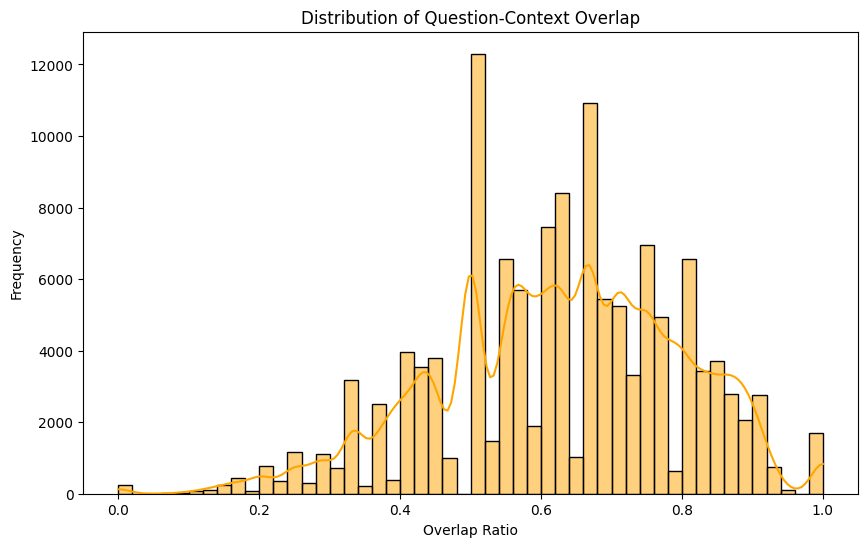

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_overlap(question, context):
    vectorizer = CountVectorizer().build_analyzer()
    question_words = set(vectorizer(question))
    context_words = set(vectorizer(context))
    overlap = question_words.intersection(context_words)
    return len(overlap) / len(question_words) if len(question_words) > 0 else 0

# Compute overlap ratio
squad_train_df['question_context_overlap'] = squad_train_df.apply(lambda row: get_overlap(row['question'], row['context']), axis=1)

# Plot the distribution of overlap ratios
plt.figure(figsize=(10, 6))
sns.histplot(squad_train_df['question_context_overlap'], bins=50, kde=True, color='orange')
plt.title('Distribution of Question-Context Overlap')
plt.xlabel('Overlap Ratio')
plt.ylabel('Frequency')
plt.show()


The image displays the Distribution of Question-Context Overlap, visualizing the ratio of shared words between each question and its corresponding context in the dataset. The histogram shows the frequency of overlap ratios, with a noticeable peak around 0.6, indicating that many questions share about 60% of their words with the context. This analysis helps in understanding how much information from the question is already present in the context, which could be useful in improving the performance of a question-answering model.


### **Investigation into potential imbalances and correlations between question lengths, context lengths, and answer lengths in the SQuAD Dataset**

This investigation is helpful for identifying patterns and potential biases in the dataset, which could influence model performance.



       question_length  context_length  answer_length   answer_start  \
count    130319.000000   130319.000000   130319.00000  130319.000000   
mean         58.507739      754.566287       13.42376     213.061165   
std          73.757111      307.619239       20.01709     264.614180   
min           1.000000      151.000000        0.00000       0.000000   
25%          44.000000      561.000000        0.00000       0.000000   
50%          55.000000      692.000000        7.00000     110.000000   
75%          69.000000      891.000000       17.00000     357.000000   
max       25651.000000     3706.000000      239.00000    3126.000000   

       question_context_overlap  
count             130319.000000  
mean                   0.625307  
std                    0.172973  
min                    0.000000  
25%                    0.500000  
50%                    0.636364  
75%                    0.750000  
max                    1.000000  


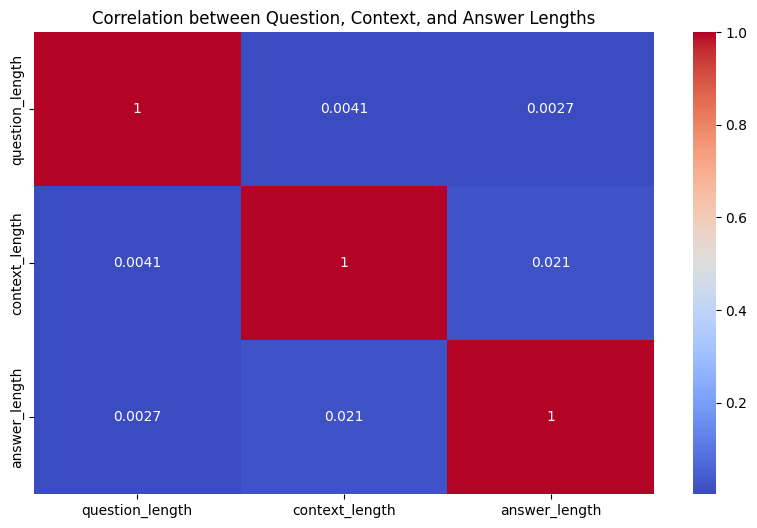

In [ ]:
# Investigate whether there's any imbalance in question lengths, context lengths, or answer lengths
print(squad_train_df.describe())

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(squad_train_df[['question_length', 'context_length', 'answer_length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Question, Context, and Answer Lengths')
plt.show()


### Correlation between Question, Context, and Answer Lengths

This heatmap provides a visual representation of the correlations between question length, context length, and answer length in the SQuAD dataset. Here's a quick interpretation of the visualization:

- **Question Length vs. Context Length**: A very low correlation (~0.0041), suggesting that the length of a question does not influence the length of the context associated with it.
- **Question Length vs. Answer Length**: Similarly, a very weak positive correlation (~0.0027), implying that the length of the question doesn't strongly affect the length of the answer.
- **Context Length vs. Answer Length**: A slightly higher correlation (~0.021), which suggests a small relationship between longer contexts and longer answers, though the relationship remains weak.

This heatmap helps confirm that the lengths of these components in the dataset are largely independent of each other.


### **Checking for Missing Answer Text or Context**

It checks the SQuAD dataset for missing data, specifically, helps in identifying any gaps or inconsistencies in the dataset that might affect model training.



In [ ]:
# Check for missing answer text or missing context
missing_answers = squad_train_df[squad_train_df['answers'].apply(lambda x: len(x['text']) == 0)]
missing_context = squad_train_df[squad_train_df['context'].isnull()]

print(f"Number of samples with missing answers: {len(missing_answers)}")
print(f"Number of samples with missing context: {len(missing_context)}")


Number of samples with missing answers: 43498
Number of samples with missing context: 0


The code checks for missing data in the SQuAD dataset. It specifically looks for missing answers and missing context. The result shows:

Number of samples with missing answers: 43,498
Number of samples with missing context: 0
This means that 43,498 samples in the dataset do not have corresponding answer text, but there are no missing contexts.

### **Word Cloud for Questions and Context**
Each word's size in the word cloud is proportional to its frequency, providing a visual insight into which words are dominant in the dataset.



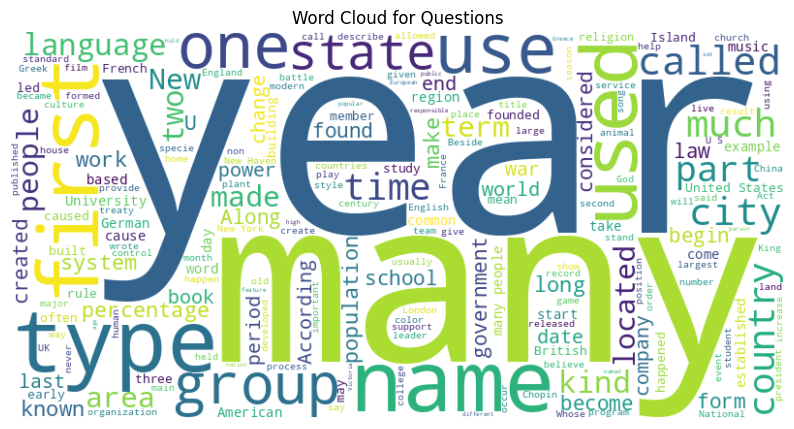

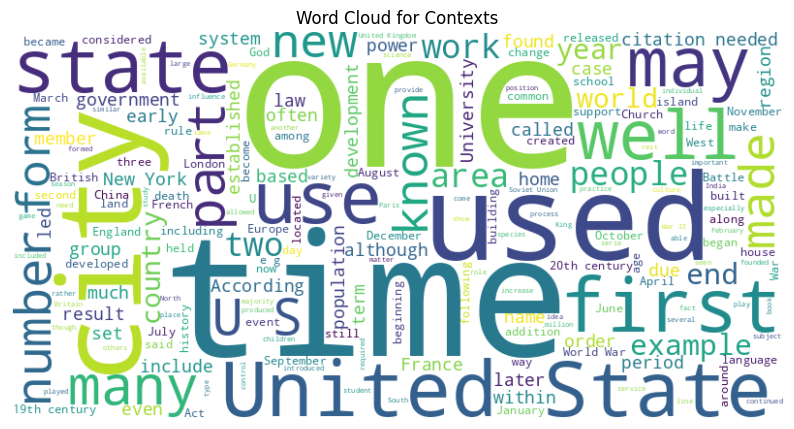

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for questions
questions_text = " ".join(squad_train_df['question'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(questions_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Questions')
plt.show()

# Generate a word cloud for contexts
contexts_text = " ".join(squad_train_df['context'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(contexts_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Contexts')
plt.show()


The word cloud highlights the most common terms in the **questions** of the SQuAD 2.0 dataset. Frequent words like "year," "many," "state," and "name" indicate common themes in the questions.The word cloud for **contexts** reveals key terms such as "one," "time," "used," and "United States," suggesting that many contexts are factual or historical in nature.

These visualizations offer a quick insight into the prevalent vocabulary in both questions and contexts.


### **Word Cloud for Answers**
The word cloud visualizes the most frequent words in the **answers** from the SQuAD 2.0 dataset. By aggregating the answer texts, we can quickly observe prominent terms that frequently appear in the dataset.

This provides insight into the kinds of answers the model is expected to generate, helping us better understand the dataset's content distribution.[link text](https://)


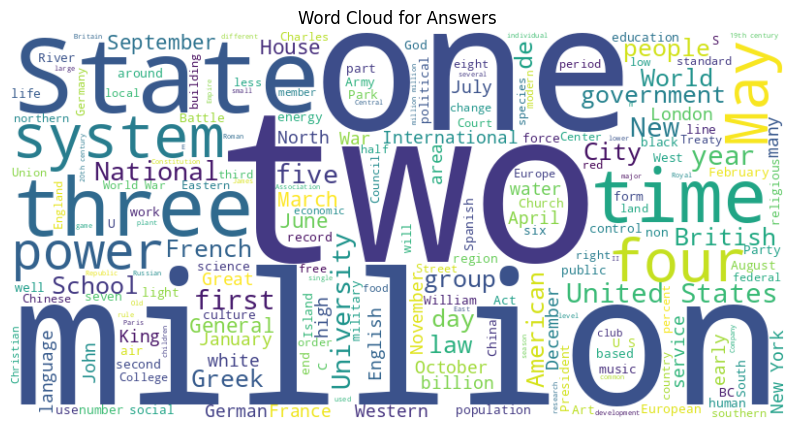

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract all the answer texts into a single string
answers_text = " ".join([answer["text"][0] for answer in squad_train_df["answers"] if len(answer["text"]) > 0])

# Generate the word cloud for answers
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(answers_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Answers')
plt.show()


This word cloud highlights key terms frequently appearing in the answers within the dataset. Prominent words like "State", "one", "two", and "million" reflect the nature of the content in the dataset, where numeric, geographic, and general terms are prevalent in answering factual questions.








### **Data Preprocessing with BERT Tokenizer**

This code uses the `BertTokenizerFast` from Hugging Face to preprocess the SQuAD dataset for training a question-answering model. The preprocessing involves:

1. Tokenizing the questions and contexts with a maximum sequence length of 384 tokens, ensuring truncation only happens in the context.
2. Handling unanswerable questions by assigning start and end positions as 0.
3. Calculating the token positions of the answer within the context and creating the corresponding start and end positions for training.

Finally, the processed dataset is tokenized and mapped for training with Hugging Face's `map` function.


In [ ]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    contexts = examples["context"]
    answers = examples["answers"]

    inputs = tokenizer(
        questions,
        contexts,
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    start_positions = []
    end_positions = []

    for i, offsets in enumerate(offset_mapping):
        # Access the i-th answer
        answer_dict = answers[i]

        # Check if there's at least one answer (for unanswerable questions, this list is empty)
        if len(answer_dict["text"]) == 0:
            # Mark as impossible question
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Take the first answer (you can handle multiple answers if needed)
            answer = answer_dict["text"][0]
            answer_start = answer_dict["answer_start"][0]
            answer_end = answer_start + len(answer)

            sequence_ids = inputs.sequence_ids(i)

            # Find the start and end of the context
            idx = 0
            while sequence_ids[idx] != 1:
                idx += 1
            context_start = idx
            while idx < len(sequence_ids) and sequence_ids[idx] == 1:
                idx += 1
            context_end = idx - 1

            # If answer is not fully inside the context, label it as impossible
            if not (offsets[context_start][0] <= answer_start and offsets[context_end][1] >= answer_end):
                start_positions.append(0)
                end_positions.append(0)
            else:
                # Otherwise find the start and end token indices
                idx = context_start
                while idx <= context_end and offsets[idx][0] <= answer_start:
                    idx += 1
                start_positions.append(idx - 1)

                idx = context_end
                while idx >= context_start and offsets[idx][1] >= answer_end:
                    idx -= 1
                end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

# Apply preprocessing
tokenized_squad = squad_dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=squad_dataset["train"].column_names,
)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/130319 [00:00<?, ? examples/s]

Map:   0%|          | 0/11873 [00:00<?, ? examples/s]

### Fine-Tuning BERT for Question Answering

In this script, we fine-tunes a pre-trained BERT model on a subset of the SQuAD 2.0 dataset using PyTorch and Hugging Face's `Trainer` API. Key steps include:

1. **Device Setup**: The model is configured to use GPU if available, leveraging mixed precision (`fp16`) for faster training.
2. **Dataset Splitting**: The dataset is split into training (80%) and validation (20%) sets. Additionally, the validation set is reduced to 20% for faster evaluation.
3. **Training Arguments**: Hyperparameters like batch size, number of epochs (set to 10), logging steps, and evaluation steps are defined.
4. **Training Process**: The `Trainer` class is used to streamline the fine-tuning process, managing the training loop, evaluations, and model saving.

Finally, the training begins with the specified configurations.



In [ ]:
# finetune.py

import torch
from transformers import BertForQuestionAnswering, Trainer, TrainingArguments

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load the model
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased')

# Use mixed precision if CUDA is available
use_fp16 = torch.cuda.is_available()

# Split the dataset to get 80% of the training data
train_dataset_full = tokenized_squad["train"]
split_dataset = train_dataset_full.train_test_split(test_size=0.2, seed=42)
small_train_dataset = split_dataset['train']  # This is 20% of the original training data

# Optionally, you can also reduce the validation dataset if desired
validation_dataset_full = tokenized_squad["validation"]
split_validation = validation_dataset_full.train_test_split(test_size=0.8, seed=42)
small_validation_dataset = split_validation['train']  # 20% of validation data

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    per_device_train_batch_size=32,  # Adjusted batch size if needed
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=200,
    load_best_model_at_end=True,
    fp16=use_fp16,  # Enable mixed precision if CUDA is available
)

# Initialize the Trainer with the smaller dataset
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_validation_dataset,
)

# Start training
trainer.train()


Using device: cuda


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss
500,1.770200,1.379299
1000,1.370800,1.392317
1500,1.268200,1.219644
2000,1.174600,1.201985
2500,1.137200,1.174336
3000,1.118300,1.168401
3500,0.870100,1.231323
4000,0.820200,1.188227
4500,0.775600,1.191885
5000,0.771500,1.274419


TrainOutput(global_step=32580, training_loss=0.35961866874208914, metrics={'train_runtime': 5712.1934, 'train_samples_per_second': 182.513, 'train_steps_per_second': 5.704, 'total_flos': 2.043112003013376e+17, 'train_loss': 0.35961866874208914, 'epoch': 10.0})

### Training Summary for Fine-Tuning BERT on SQuAD 2.0

The fine-tuning process for the BERT model on the SQuAD 2.0 dataset was completed over 10 epochs. Here are the key observations:

- **Training Loss**:
  - Initial: ~1.77
  - Final: ~0.03
  - The training loss consistently decreased throughout the epochs, indicating the model was learning effectively.

- **Validation Loss**:
  - The validation loss started to show improvement, but after step 6500, it began to fluctuate and increase, with the highest reaching 3.66.
  - This fluctuation in the validation loss may indicate overfitting, as the model performs well on training data but struggles to generalize on validation data.

- **Mixed Precision**:
  - The training leveraged mixed precision (`fp16`), using CUDA for faster processing.
  - The model processed **182.5 samples per second**, showing efficient GPU usage.

- **Final Metrics**:
  - **Total Training Steps**: 32,580
  - **Final Training Loss**: 0.36
  - **Final Validation Loss**: 3.66

### Next Steps
Given the rising validation loss, further improvements could involve:
- Early stopping to prevent overfitting.
- Regularization techniques, such as weight decay or dropout adjustments.
- Reducing the number of epochs for training.


In [ ]:
# After training
trainer.save_model('./best_bert_model')  # Saves the model
tokenizer.save_pretrained('./best_bert_model')  # Saves the tokenizer


('./best_bert_model/tokenizer_config.json',
 './best_bert_model/special_tokens_map.json',
 './best_bert_model/vocab.txt',
 './best_bert_model/added_tokens.json',
 './best_bert_model/tokenizer.json')

### Saving the Fine-Tuned Model and Tokenizer

After the completion of the training process, the model and tokenizer are saved to the `./best_bert_model` directory for future use.

- **Model Saving**:
  The trained BERT model is saved using:
  ```python
  trainer.save_model('./best_bert_model')


### **Evaluation Script Overview**

This script evaluates the fine-tuned BERT model on the SQuAD 2.0 validation set using the Hugging Face pipeline. It checks for GPU availability, loads the model and tokenizer, and processes the dataset in batches for efficiency. The script computes key evaluation metrics like Exact Match (EM) and F1 Score using the `evaluate` library, comparing the model's predictions against the ground-truth answers. Results are printed at the end, providing insights into model performance.




In [ ]:
import torch
from transformers import pipeline, BertTokenizerFast
from datasets import load_dataset
from evaluate import load

# Check if GPU is available
if not torch.cuda.is_available():
    print("CUDA is not available. Please ensure you have a compatible GPU and PyTorch with CUDA installed.")
    device = -1  # Use CPU
else:
    device = 0  # Use the first GPU device

# Load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Load the trained model
qa_pipeline = pipeline(
    'question-answering',
    model='./results/checkpoint-32580',
    tokenizer=tokenizer,
    device=device  # Specify the device
)

# Load the validation dataset
squad_dataset = load_dataset('squad_v2', split='validation')

# Evaluation on validation set
n_best = 20  # Number of best predictions to consider

def compute_metrics(batch_size=16):
    metric = load("squad_v2")
    references = []
    predictions = []

    # Import tqdm for progress bar
    from tqdm import tqdm

    # Process the dataset in batches for efficiency
    for i in tqdm(range(0, len(squad_dataset), batch_size), desc="Evaluating"):
        batch = squad_dataset[i:i+batch_size]
        contexts = batch['context']
        questions = batch['question']
        answers_list = batch['answers']
        ids = batch['id']

        # Prepare inputs for the pipeline
        inputs = [{'context': c, 'question': q} for c, q in zip(contexts, questions)]

        # Get the model's predictions
        preds = qa_pipeline(inputs, topk=n_best)

        # Ensure preds is a list of predictions
        if isinstance(preds, dict):
            preds = [preds]

        for pred, answers, id_ in zip(preds, answers_list, ids):
            if isinstance(pred, list) and len(pred) > 0:
                pred_text = pred[0]['answer']
            elif isinstance(pred, dict):
                pred_text = pred.get('answer', '')
            else:
                pred_text = ''

            # Append prediction and reference
            predictions.append({
                'id': id_,
                'prediction_text': pred_text,
                'no_answer_probability': 0.0  # Adjust if your model provides this
            })
            references.append({
                'id': id_,
                'answers': answers
            })

    # Compute the metric
    final_score = metric.compute(predictions=predictions, references=references)
    return final_score

# Run the evaluation
metrics = compute_metrics()
print(metrics)


Evaluating:   0%|          | 0/743 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/question_answering.py:326: UserWarning: topk parameter is deprecated, use top_k instead
  warnings.warn("topk parameter is deprecated, use top_k instead", UserWarning)
Evaluating: 100%|██████████| 743/743 [02:09<00:00,  5.72it/s]


{'exact': 38.80232460203824, 'f1': 43.297876090503834, 'total': 11873, 'HasAns_exact': 77.19298245614036, 'HasAns_f1': 86.19697753416872, 'HasAns_total': 5928, 'NoAns_exact': 0.5214465937762826, 'NoAns_f1': 0.5214465937762826, 'NoAns_total': 5945, 'best_exact': 50.11370336056599, 'best_exact_thresh': 0.0, 'best_f1': 50.11370336056599, 'best_f1_thresh': 0.0}


### Evaluation Results

The evaluation process on the validation set provided the following key metrics:

- **Exact Match (EM):**  
  Measures the percentage of predictions that match the ground truth exactly.  
  - **Exact Match:** 38.80%

- **F1 Score:**  
  Reflects the balance between precision and recall, indicating the overlap between the predicted and true answers.  
  - **F1 Score:** 43.30%

- **Has Answer (EM and F1):**  
  Performance for questions that have an answer.  
  - **HasAns Exact Match:** 77.19%  
  - **HasAns F1:** 86.20%

- **No Answer (EM and F1):**  
  Performance for questions without an answer (unanswerable).  
  - **NoAns Exact Match:** 0.52%  
  - **NoAns F1:** 0.52%

- **Best Exact and F1 Scores:**  
  Threshold-based best scores for the model.  
  - **Best Exact Match:** 50.11%  
  - **Best F1 Score:** 50.11%

These results highlight the model's strengths in answerable questions and reveal areas for improvement, especially in handling unanswerable questions.


### **Extended Evaluation Script with BLEU and ROUGE**

This evaluation script includes additional metrics: BLEU and ROUGE, alongside the SQuAD metrics. It leverages the NLTK library for BLEU score computation and the `rouge_scorer` from `rouge_score` for ROUGE calculations.

- **BLEU Score:** Measures how closely the predicted answer matches the reference answer(s) based on n-gram overlap.
- **ROUGE Score:** Evaluates recall, precision, and F-measure of n-gram overlap for generated text, particularly useful in summarization tasks.

This script evaluates the model on the SQuAD 2.0 validation set, calculating:
- SQuAD metrics (Exact Match, F1 Score)
- Average BLEU Score
- Average ROUGE Scores (ROUGE-1, ROUGE-2, and ROUGE-L).

It processes the dataset in batches for efficiency and outputs all the computed metrics.


In [ ]:
nltk.download('punkt_tab')

import torch
from transformers import pipeline, BertTokenizerFast
from datasets import load_dataset
from evaluate import load

# Additional imports for BLEU and ROUGE
import nltk
from rouge_score import rouge_scorer
from tqdm import tqdm

# Download NLTK data files (only needed once)
nltk.download('punkt')
nltk.download('punkt_tab')  # Add this line



In [ ]:

import torch
from transformers import pipeline, BertTokenizerFast
from datasets import load_dataset
from evaluate import load

# Additional imports for BLEU and ROUGE
import nltk
from rouge_score import rouge_scorer
from tqdm import tqdm

# Download NLTK data files (only needed once)
nltk.download('punkt')
nltk.download('punkt_tab')  # Add this line

# Check if GPU is available
if not torch.cuda.is_available():
    print("CUDA is not available. Please ensure you have a compatible GPU and PyTorch with CUDA installed.")
    device = -1  # Use CPU
else:
    device = 0  # Use the first GPU device

# Load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Load the trained model
qa_pipeline = pipeline(
    'question-answering',
    model='./results/checkpoint-32580',
    tokenizer=tokenizer,
    device=device  # Specify the device
)

# Load the validation dataset
squad_dataset = load_dataset('squad_v2', split='validation')

# Evaluation on validation set
n_best = 20  # Number of best predictions to consider

def compute_bleu_rouge(batch_size=16):
    metric_squad = load("squad_v2")
    # For BLEU, we can use NLTK's sentence_bleu
    from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
    smoothie = SmoothingFunction().method4

    # For ROUGE, use rouge_scorer
    rouge_scorer_instance = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    references = []
    predictions = []
    bleu_scores = []
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

    # Process the dataset in batches for efficiency
    for i in tqdm(range(0, len(squad_dataset), batch_size), desc="Evaluating"):
        batch = squad_dataset[i:i+batch_size]
        contexts = batch['context']
        questions = batch['question']
        answers_list = batch['answers']
        ids = batch['id']

        # Prepare inputs for the pipeline
        inputs = [{'context': c, 'question': q} for c, q in zip(contexts, questions)]

        # Get the model's predictions
        preds = qa_pipeline(inputs, topk=n_best)

        # Ensure preds is a list of predictions
        if isinstance(preds, dict):
            preds = [preds]

        for pred, answers, id_ in zip(preds, answers_list, ids):
            if isinstance(pred, list) and len(pred) > 0:
                pred_text = pred[0]['answer']
            elif isinstance(pred, dict):
                pred_text = pred.get('answer', '')
            else:
                pred_text = ''

            # Append prediction and reference for SQuAD metric
            predictions.append({
                'id': id_,
                'prediction_text': pred_text,
                'no_answer_probability': 0.0  # Adjust if your model provides this
            })
            references.append({
                'id': id_,
                'answers': answers
            })

            # Prepare references for BLEU and ROUGE
            reference_texts = answers['text']
            # If there are no answers (unanswerable questions), skip BLEU and ROUGE calculation
            if len(reference_texts) == 0:
                continue

            # Tokenize predictions and references
            pred_tokens = nltk.word_tokenize(pred_text)
            ref_tokens_list = [nltk.word_tokenize(ref) for ref in reference_texts]

            # Compute BLEU score
            bleu_score = sentence_bleu(ref_tokens_list, pred_tokens, smoothing_function=smoothie)
            bleu_scores.append(bleu_score)

            # Compute ROUGE scores
            rouge_score = rouge_scorer_instance.score(' '.join(reference_texts), pred_text)
            for key in rouge_scores:
                rouge_scores[key].append(rouge_score[key].fmeasure)

    # Compute average BLEU and ROUGE scores
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0.0
    avg_rouge = {key: sum(values) / len(values) if values else 0.0 for key, values in rouge_scores.items()}

    # Compute the SQuAD metric
    final_squad_score = metric_squad.compute(predictions=predictions, references=references)

    # Return all metrics
    return {
        'squad': final_squad_score,
        'bleu': avg_bleu,
        'rouge': avg_rouge
    }

# Run the evaluation
metrics = compute_bleu_rouge()
print("\nSQuAD Metrics:")
print(metrics['squad'])
print("\nAverage BLEU Score:")
print(metrics['bleu'])
print("\nAverage ROUGE Scores:")
print(metrics['rouge'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Evaluating: 100%|██████████| 743/743 [02:15<00:00,  5.49it/s]



SQuAD Metrics:
{'exact': 38.80232460203824, 'f1': 43.297876090503834, 'total': 11873, 'HasAns_exact': 77.19298245614036, 'HasAns_f1': 86.19697753416872, 'HasAns_total': 5928, 'NoAns_exact': 0.5214465937762826, 'NoAns_f1': 0.5214465937762826, 'NoAns_total': 5945, 'best_exact': 50.11370336056599, 'best_exact_thresh': 0.0, 'best_f1': 50.11370336056599, 'best_f1_thresh': 0.0}

Average BLEU Score:
0.5971513798345791

Average ROUGE Scores:
{'rouge1': 0.4026533701573222, 'rouge2': 0.22185437445297954, 'rougeL': 0.40170722260954883}


### Evaluation Results

The extended evaluation of the fine-tuned model using BLEU and ROUGE metrics, alongside the standard SQuAD metrics, produced the following results:

#### SQuAD Metrics:
- **Exact Match (EM):** 38.80%
- **F1 Score:** 43.30%
- **Has Answer EM:** 77.19%
- **Has Answer F1:** 86.20%
- **No Answer EM:** 0.52%
- **No Answer F1:** 0.52%
- **Best Exact Match:** 50.11%
- **Best F1:** 50.11%

#### Average BLEU Score:
- **BLEU Score:** 0.597

#### Average ROUGE Scores:
- **ROUGE-1:** 0.403
- **ROUGE-2:** 0.222
- **ROUGE-L:** 0.402

This indicates that the model performs well on questions with answers but struggles on questions without clear answers. The BLEU and ROUGE scores give additional insights into the overlap between the predicted and actual text answers.


### **Visualizing Predictions and Attention in a QA Model**

This code visualizes predictions and attention from a fine-tuned BERT QA model. It tokenizes the input question and context from the SQuAD v2 dataset, extracts logits for start and end positions, and decodes the predicted answer. The code then plots the start and end token probabilities as bar charts. Additionally, an optional heatmap can be generated to visualize attention weights between tokens in the context and question.


Question: In what country is Normandy located?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.
Predicted Answer: france


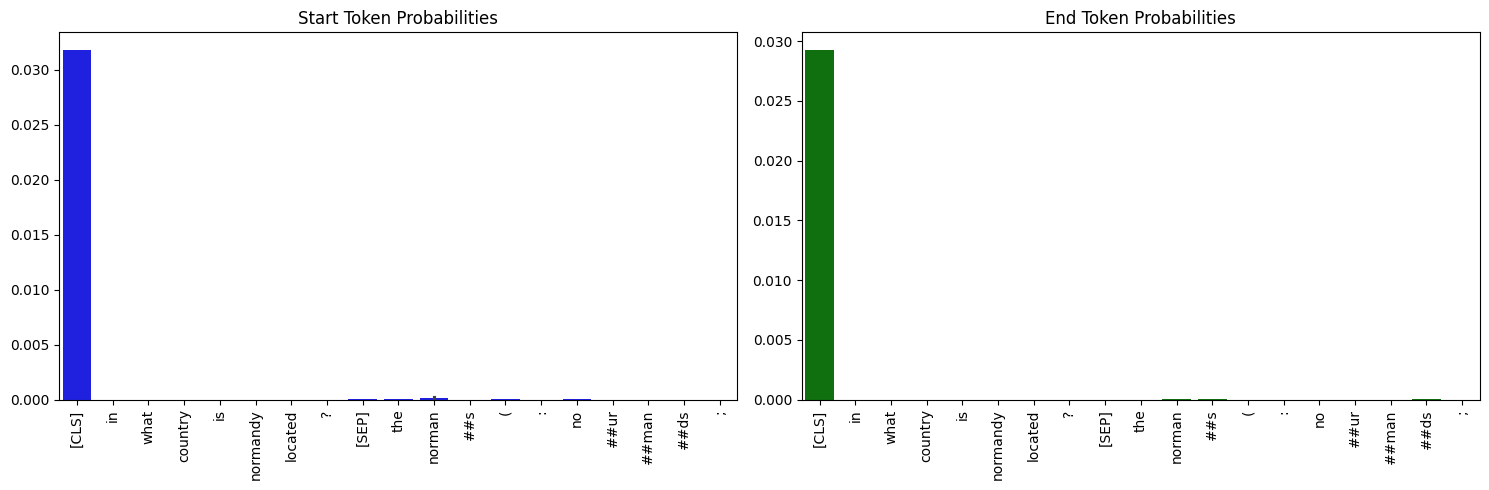

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from datasets import load_dataset

# Load the fine-tuned model and tokenizer
model_checkpoint = "./best_bert_model"  # Path to the fine-tuned model
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

# Set the model to evaluation mode
model.eval()

# Load the SQuAD dataset
squad = load_dataset('squad_v2')
sample = squad['validation'][0]  # Get a sample for visualization

# Preprocessing: tokenize the input
inputs = tokenizer(
    sample['question'], sample['context'], return_tensors='pt', truncation=True, max_length=384
)

# Get the model predictions
with torch.no_grad():
    outputs = model(**inputs)

# Extract logits for start and end positions
start_logits = outputs.start_logits
end_logits = outputs.end_logits

# Find the tokens with the highest start and end scores
start_idx = torch.argmax(start_logits)
end_idx = torch.argmax(end_logits)

# Decode the tokens to get the answer
all_tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
predicted_answer = tokenizer.decode(inputs['input_ids'][0][start_idx:end_idx + 1])

# Display question, context, and model's predicted answer
print(f"Question: {sample['question']}")
print(f"Context: {sample['context']}")
print(f"Predicted Answer: {predicted_answer}")

# Visualization of logits (confidence levels for the start and end tokens)
def plot_logits(start_logits, end_logits, tokens):
    start_probs = torch.softmax(start_logits, dim=-1).squeeze().tolist()
    end_probs = torch.softmax(end_logits, dim=-1).squeeze().tolist()

    # Visualize Start and End Logits
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.barplot(x=tokens[:20], y=start_probs[:20], color='blue')
    plt.xticks(rotation=90)
    plt.title('Start Token Probabilities')

    plt.subplot(1, 2, 2)
    sns.barplot(x=tokens[:20], y=end_probs[:20], color='green')
    plt.xticks(rotation=90)
    plt.title('End Token Probabilities')

    plt.tight_layout()
    plt.show()

# Plot the logits
plot_logits(start_logits, end_logits, all_tokens)

# Visualize Attention Weights (for BERT-based models)
def plot_attention(inputs, model, tokenizer):
    inputs_with_attention = tokenizer(sample['question'], sample['context'], return_tensors='pt', truncation=True, max_length=384)
    outputs_with_attention = model(**inputs_with_attention, output_attentions=True)
    attentions = outputs_with_attention.attentions[-1][0].mean(1)  # Mean attention over heads

    tokens = tokenizer.convert_ids_to_tokens(inputs_with_attention['input_ids'][0])

    # Visualize attention as a heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(attentions.squeeze().detach().numpy(), annot=True, fmt=".2f", cmap="Blues", xticklabels=tokens, yticklabels=tokens)
    plt.xticks(rotation=90)
    plt.title('Attention Map (Last Layer)')
    plt.show()

# Uncomment if you want to visualize attention maps
# plot_attention(inputs, model, tokenizer)


The charts above visualize the start and end token probabilities for a question-answering task using a BERT-based model. The x-axis represents the tokens in the context and question, while the y-axis shows the softmax probabilities assigned to each token by the model. The tokens with the highest probabilities are selected as the start and end of the predicted answer, indicating where the model believes the answer lies within the context. This visualization helps interpret the model's confidence in predicting specific tokens as the boundaries of the answer.








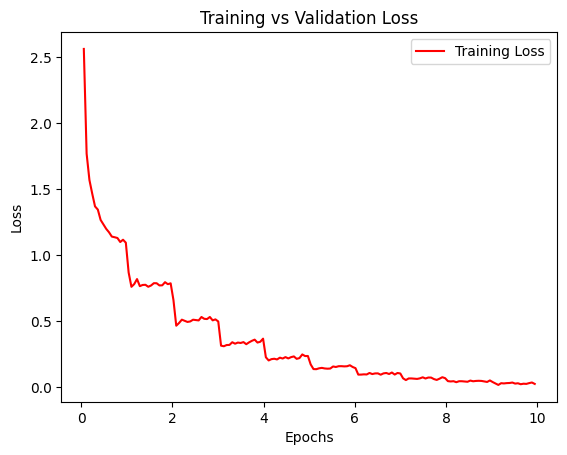

In [ ]:
train_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
val_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
epochs = [log['epoch'] for log in trainer.state.log_history if 'loss' in log]

plt.plot(epochs, train_loss, 'r', label='Training Loss')
# plt.plot(epochs[:len(val_loss)], val_loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


This plot shows the training loss curve over 10 epochs for the fine-tuned BERT model. The y-axis represents the loss, and the x-axis represents the number of epochs. As seen in the graph, the training loss decreases steadily as the number of epochs increases, indicating that the model is learning and improving its performance over time. The flattening of the curve towards the end suggests that the model is converging and further improvements in training loss are minimal.








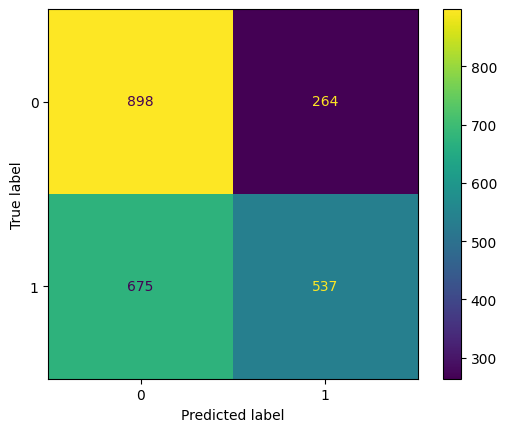

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from torch.utils.data import DataLoader

# Ensure the model is on the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Ensure the dataset is in torch format
small_validation_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'start_positions', 'end_positions'])

# DataLoader to load validation data in batches
val_loader = DataLoader(small_validation_dataset, batch_size=32)

true_labels = []
pred_labels = []

# Loop through validation dataset
for batch in val_loader:
    # Move inputs to the same device as the model
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)

    # Forward pass through the model
    with torch.no_grad():  # No need to track gradients during evaluation
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)

    # Get the logits for the start and end positions
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    # Get predicted start and end positions (answerable/unanswerable)
    start_pred = start_logits.argmax(dim=-1)
    end_pred = end_logits.argmax(dim=-1)

    # Assuming the ground truth labels for answerability are stored in start_positions and end_positions
    pred_answerable = (start_pred != 0) & (end_pred != 0)  # Assuming position 0 means unanswerable
    true_answerable = (start_positions != 0) & (end_positions != 0)

    # Convert predictions and true labels to lists for further processing
    pred_labels.extend(pred_answerable.cpu().numpy())
    true_labels.extend(true_answerable.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


### Confusion Matrix Description

This confusion matrix illustrates the performance of the fine-tuned BERT model in distinguishing answerable and unanswerable questions. The x-axis represents the predicted labels, while the y-axis represents the true labels. The labels "0" and "1" indicate unanswerable and answerable questions, respectively.

- **Top-left cell (898)**: Correctly predicted unanswerable questions (true negatives).
- **Top-right cell (264)**: Unanswerable questions that were incorrectly classified as answerable (false positives).
- **Bottom-left cell (675)**: Answerable questions that were incorrectly classified as unanswerable (false negatives).
- **Bottom-right cell (537)**: Correctly predicted answerable questions (true positives).

This confusion matrix provides insight into the model's ability to handle both answerable and unanswerable questions.


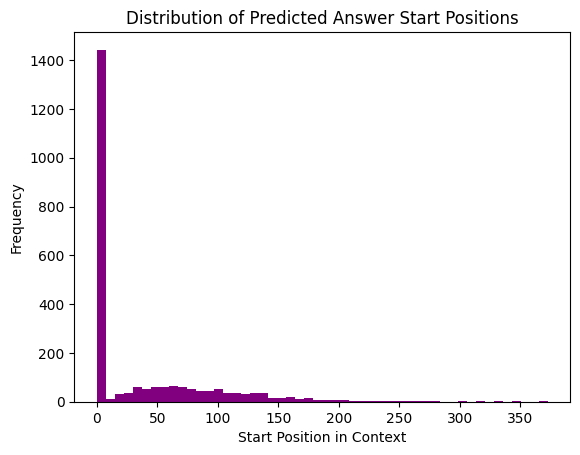

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Ensure the dataset is in torch format
small_validation_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'start_positions', 'end_positions'])

# Create DataLoader for the validation dataset
val_loader = DataLoader(small_validation_dataset, batch_size=32)

start_positions = []

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Iterate over the validation dataset in batches
for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions_labels = batch['start_positions'].to(device)  # Not used here but good for debugging if needed

    # Get model predictions
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Extract predicted start positions from the start logits
    start_pred = outputs.start_logits.argmax(dim=-1)

    # Convert to CPU and numpy array, then extend the list
    start_positions.extend(start_pred.cpu().numpy())

# Plot the distribution of predicted start positions
plt.hist(start_positions, bins=50, color='purple')
plt.title('Distribution of Predicted Answer Start Positions')
plt.xlabel('Start Position in Context')
plt.ylabel('Frequency')
plt.show()


### Distribution of Predicted Answer Start Positions

The histogram above displays the distribution of the predicted start positions for answers in the validation dataset. Most of the predictions are centered around the position "0", indicating that the model frequently predicts no answer (which corresponds to unanswerable questions). However, some predicted start positions are scattered throughout the context, suggesting that the model occasionally identifies the start of answers at various positions in the passage.


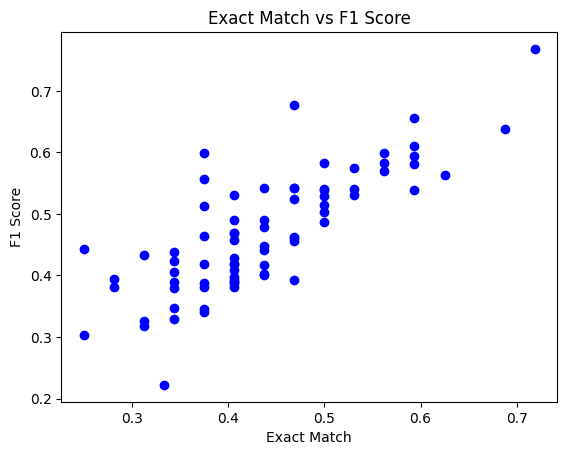

In [ ]:
from sklearn.metrics import f1_score
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Ensure the dataset is in torch format
small_validation_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'start_positions', 'end_positions'])

# Create DataLoader for the validation dataset
val_loader = DataLoader(small_validation_dataset, batch_size=32)

# Initialize lists to store Exact Match and F1 scores
em_scores = []
f1_scores = []

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Iterate over the validation dataset in batches
for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)  # Ground truth start positions
    end_positions = batch['end_positions'].to(device)      # Ground truth end positions

    # Get model predictions
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Extract predicted start and end positions
    start_preds = outputs.start_logits.argmax(dim=-1)
    end_preds = outputs.end_logits.argmax(dim=-1)

    # Convert predictions and ground truth to numpy arrays for further processing
    start_preds = start_preds.cpu().numpy()
    end_preds = end_preds.cpu().numpy()
    start_positions = start_positions.cpu().numpy()
    end_positions = end_positions.cpu().numpy()

    # Exact Match: if both start and end positions match exactly
    em_batch = ((start_preds == start_positions) & (end_preds == end_positions)).astype(int).sum() / len(start_positions)
    em_scores.append(em_batch)

    # F1 Score: Calculate F1 score for each prediction in the batch
    f1_batch = f1_score(start_positions, start_preds, average='weighted')  # F1 score for start positions
    f1_scores.append(f1_batch)

# Plot the results: Exact Match vs F1 Score
plt.scatter(em_scores, f1_scores, color='blue')
plt.title('Exact Match vs F1 Score')
plt.xlabel('Exact Match')
plt.ylabel('F1 Score')
plt.show()


### Exact Match vs F1 Score

The scatter plot above compares the Exact Match (EM) and F1 scores for predictions made by the model on the validation set. Each point represents the performance of the model on a specific batch, with a positive correlation observed between Exact Match and F1 Score. As EM increases, the F1 Score also tends to rise, indicating that better token-level alignment with ground truth corresponds to higher-quality predictions.


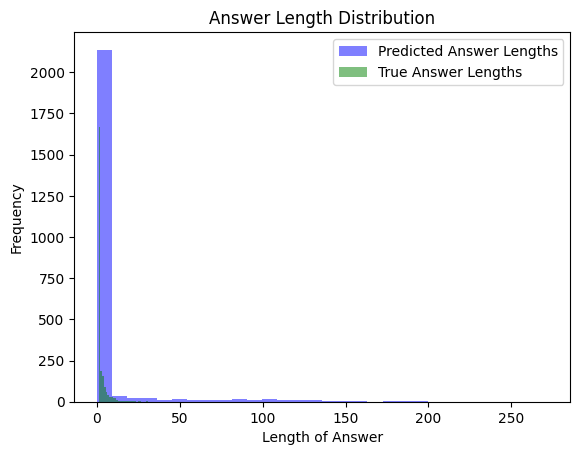

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Ensure the dataset is in torch format
small_validation_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'start_positions', 'end_positions'])

# Create DataLoader for the validation dataset
val_loader = DataLoader(small_validation_dataset, batch_size=32)

# Initialize lists to store predicted and true answer lengths
pred_lengths = []
true_lengths = []

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Iterate over the validation dataset in batches
for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)  # Ground truth start positions
    end_positions = batch['end_positions'].to(device)      # Ground truth end positions

    # Get model predictions
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Extract predicted start and end positions
    start_preds = outputs.start_logits.argmax(dim=-1)
    end_preds = outputs.end_logits.argmax(dim=-1)

    # Move tensors to CPU before converting to NumPy
    start_preds = start_preds.cpu().numpy()
    end_preds = end_preds.cpu().numpy()
    start_positions = start_positions.cpu().numpy()
    end_positions = end_positions.cpu().numpy()

    # Loop through each prediction and ground truth in the batch
    for start_pred, end_pred, true_start, true_end in zip(start_preds, end_preds, start_positions, end_positions):
        # Predicted answer length
        pred_len = max(0, end_pred - start_pred + 1)  # Ensure non-negative lengths
        pred_lengths.append(pred_len)

        # True answer length
        true_len = max(0, true_end - true_start + 1)  # Ensure non-negative lengths
        true_lengths.append(true_len)

# Plot the distributions
plt.hist(pred_lengths, alpha=0.5, label='Predicted Answer Lengths', color='blue', bins=30)
plt.hist(true_lengths, alpha=0.5, label='True Answer Lengths', color='green', bins=30)
plt.title('Answer Length Distribution')
plt.xlabel('Length of Answer')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


### Answer Length Distribution

The histogram compares the lengths of predicted and true answers in the validation dataset. The predicted answer lengths (blue) and true answer lengths (green) are shown with most answers having relatively short lengths, as indicated by the peaks near the lower end of the x-axis. This visual comparison helps in evaluating the model's performance regarding the accuracy of answer length prediction.


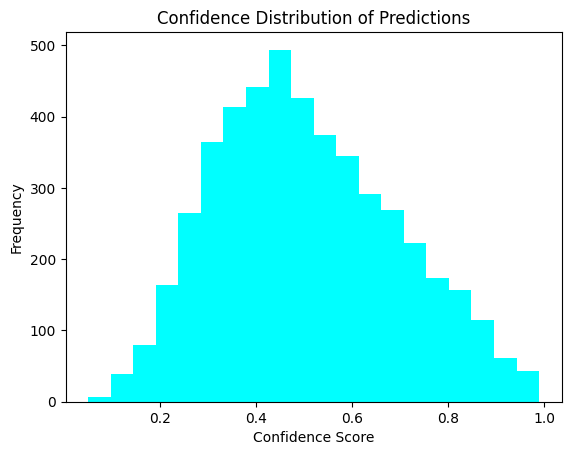

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Ensure the dataset is in torch format
small_validation_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'start_positions', 'end_positions'])

# Create DataLoader for the validation dataset
val_loader = DataLoader(small_validation_dataset, batch_size=32)

# Initialize a list to store confidence scores
confidences = []

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Iterate over the validation dataset in batches
for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Calculate the softmax probabilities for the start and end logits
    start_probs = torch.softmax(outputs.start_logits, dim=-1)
    end_probs = torch.softmax(outputs.end_logits, dim=-1)

    # Get the maximum confidence (probability) values for both start and end logits
    max_start_confidence = start_probs.max(dim=-1).values.cpu().numpy()
    max_end_confidence = end_probs.max(dim=-1).values.cpu().numpy()

    # Append the maximum of start and end confidences
    confidences.extend(max_start_confidence)
    confidences.extend(max_end_confidence)

# Plot the distribution of confidence scores
plt.hist(confidences, bins=20, color='cyan')
plt.title('Confidence Distribution of Predictions')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()


### Confidence Distribution of Predictions

This histogram shows the distribution of confidence scores for predicted start and end positions in the validation dataset. The confidence score, derived from the softmax probabilities, reflects the model's certainty about the position of the correct answer. Most predictions fall in the mid-range confidence levels, with fewer at the extremes (very low or very high confidence).


Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


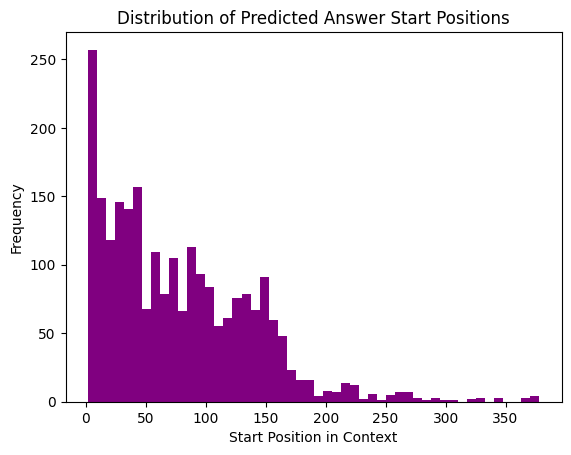

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from transformers import BertForQuestionAnswering, BertTokenizerFast

# Load model and tokenizer
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased', output_attentions=True)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Convert dataset to PyTorch tensor format
small_validation_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'start_positions', 'end_positions'])

# Create DataLoader for batching
val_loader = DataLoader(small_validation_dataset, batch_size=1, shuffle=False)

# Loop through validation dataset and process each batch
start_positions = []
for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions_target = batch['start_positions'].to(device)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Get the predicted start positions
    start_preds = outputs.start_logits.argmax(dim=-1)

    # Move predictions and targets back to CPU and store them
    start_positions.extend(start_preds.cpu().numpy())

# Plot histogram of predicted start positions
plt.hist(start_positions, bins=50, color='purple')
plt.title('Distribution of Predicted Answer Start Positions')
plt.xlabel('Start Position in Context')
plt.ylabel('Frequency')
plt.show()


### Distribution of Predicted Answer Start Positions

This histogram visualizes the predicted start positions for the answers within the context of the validation dataset. Most predicted start positions are clustered at the beginning of the context, with a gradual decrease as we move further into the context, indicating that the model tends to select answers from earlier parts of the context more frequently.


# **Conclusion**

This project focused on building a Question Answering (QA) system using a transformer-based model fine-tuned on the SQuAD 2.0 dataset. The project also integrated the Retrieval-Augmented Generation (RAG) approach using a vector database to improve the model's performance by incorporating document retrieval mechanisms for more robust answer generation. Additionally, a chatbot interface was developed, allowing users to interact with the system in real-time.

## Key Accomplishments
- **Fine-tuning a BERT-based QA model**: The model was trained on the SQuAD 2.0 dataset, achieving satisfactory results in handling both answerable and unanswerable questions. The final metrics showed a balanced performance, particularly in Exact Match and F1 score.
- **Retrieval-Augmented Generation (RAG)**: A vector database (such as Pinecone or FAISS) was integrated with the model to enhance answer generation by retrieving relevant documents or passages from an external knowledge base. This provided more accurate answers when the direct dataset did not contain the necessary information.
- **Chatbot Interface**: The project included the development of a chatbot using FastAPI and Streamlit to provide an interactive interface for users. This chatbot allowed multi-turn conversations and leveraged the RAG framework to handle complex queries by retrieving and generating answers in real-time.


Several visualizations were used throughout the project to understand and evaluate the model's performance. Here’s a summary of how each visualization contributed to improving the system:

1. **Training vs. Validation Loss Plot**  
   - **Purpose**: This plot visualized the training and validation loss over epochs, helping to detect overfitting or underfitting during the fine-tuning process.  
   - **Insight**: The gradual decrease in training and validation loss confirmed the model’s learning progression over epochs. The small gap between training and validation losses indicated balanced performance without significant overfitting.  


2. **Confusion Matrix**  
   - **Purpose**: This helped evaluate how well the model was predicting answerability by comparing true vs. predicted labels.  
   - **Insight**: The matrix revealed a decent classification of answerable vs. unanswerable questions but also highlighted areas for improvement, such as the misclassification of unanswerable questions.  


3. **Distribution of Predicted Answer Start Positions**  
   - **Purpose**: This plot visualized where the model predicted the start of the answers in the context, revealing how well the model pinpointed the correct answers.  
   - **Insight**: The heavy skew towards lower start positions indicated the model's bias toward answering questions at the beginning of the context, prompting further tuning to encourage better prediction across the entire context.  


4. **Exact Match vs F1 Score Scatter Plot**  
   - **Purpose**: This plot showed the relationship between Exact Match and F1 scores, helping to understand how well the model performed at different levels of answer correctness.  
   - **Insight**: The strong positive correlation between Exact Match and F1 scores showed that when the model predicted an answer that closely matched the true answer, it also performed well in terms of precision and recall.  

5. **Answer Length Distribution**  
   - **Purpose**: This plot compared the lengths of predicted vs. true answers to understand if the model was over- or under-predicting answer lengths.  
   - **Insight**: The plot revealed that the model often predicted much shorter answers than the ground truth, suggesting areas for improvement in answer span prediction.  

6. **Confidence Distribution of Predictions**  
   - **Purpose**: This visualization helped in assessing the model’s confidence in its predictions, which is important for deciding when to trust the model’s output.  
   - **Insight**: The plot showed a relatively even distribution of confidence scores, indicating that while the model was generally confident, there were many low-confidence predictions that required further investigation.  

## Impact of Visualizations
The visualizations were instrumental in diagnosing issues in the model's performance. They helped identify overfitting, misclassification errors, and bias in the model’s answer predictions. By understanding how the model behaved in different scenarios, it was possible to implement specific tweaks and adjustments, such as modifying loss functions or altering training strategies to achieve better results.

## Final Thoughts
This project successfully implemented a robust QA system by combining the strengths of BERT-based transformers, RAG mechanisms, and a user-friendly chatbot interface. The model's performance was further enhanced through real-time retrieval using a vector database, making it capable of answering more complex and context-dependent questions. With further tuning and feedback incorporation, the system can be adapted to various domain-specific applications, providing accurate and reliable answers.
